<a href="https://colab.research.google.com/github/Manish-2708/pyt_man/blob/main/assignment_17svm(forestfires).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
#Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report

In [127]:
#IMPORT DATASET
forestfires = pd.read_csv('/content/forestfires (1).csv')
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [128]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [129]:
forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [130]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Visualisation

In [131]:
y_count = forestfires.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


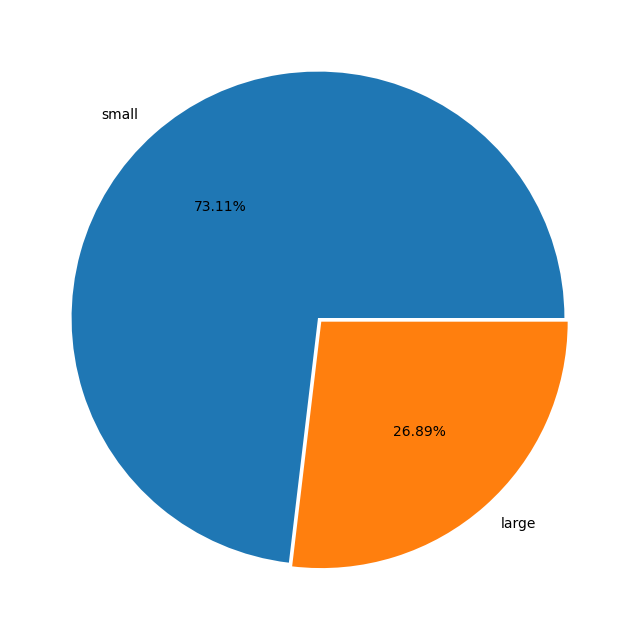

In [132]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [133]:
month_df = forestfires.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


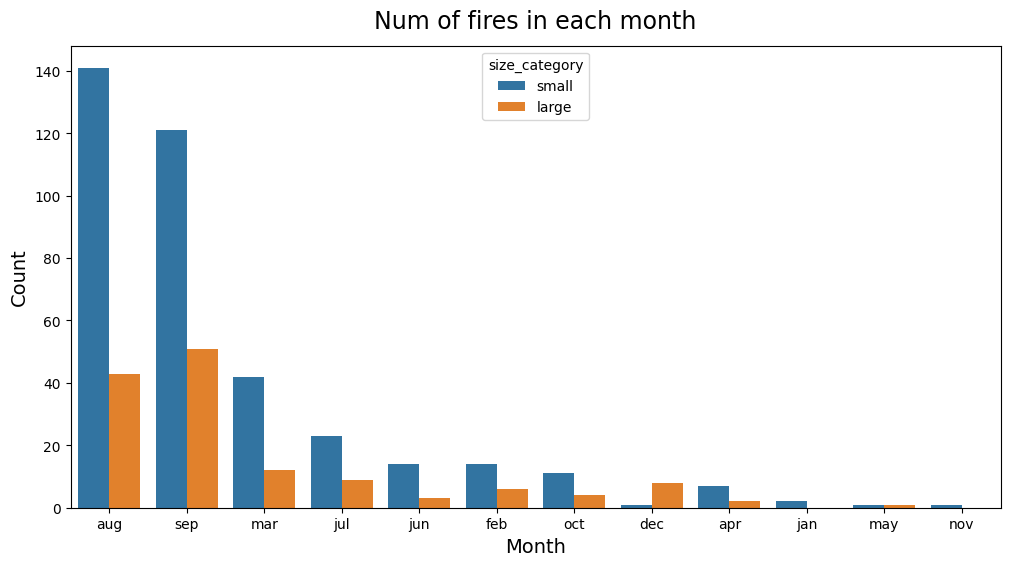

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [135]:
day_df = forestfires.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


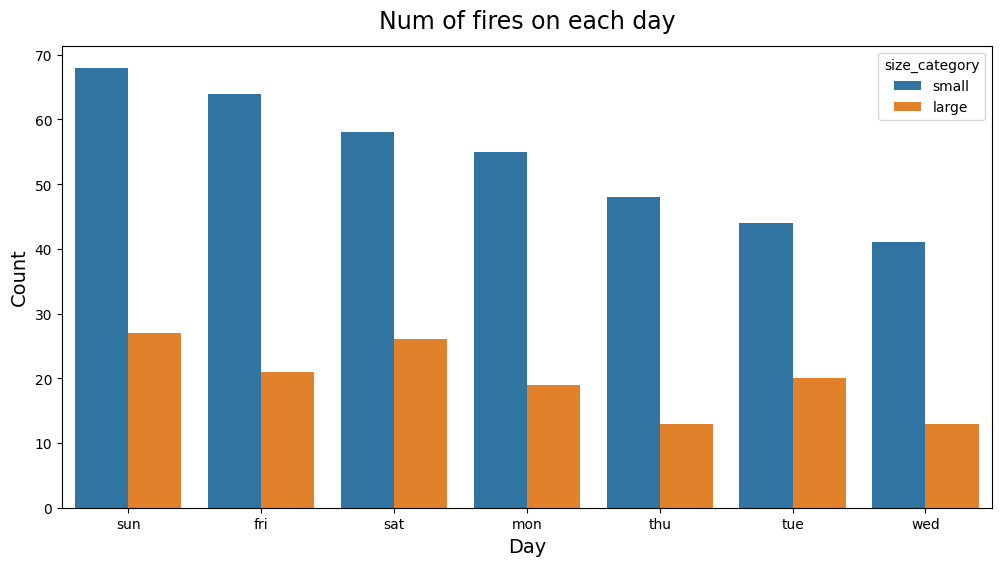

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Label Encoder

In [137]:
labelencoder = LabelEncoder()
forestfires.iloc[:,-1] = labelencoder.fit_transform(forestfires.iloc[:,-1])
forestfires['size_category']  #1 for small, 0 for large

<ipython-input-137-e2f2bfd24fcd>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  forestfires.iloc[:,-1] = labelencoder.fit_transform(forestfires.iloc[:,-1])


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [138]:
rain_df = forestfires.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


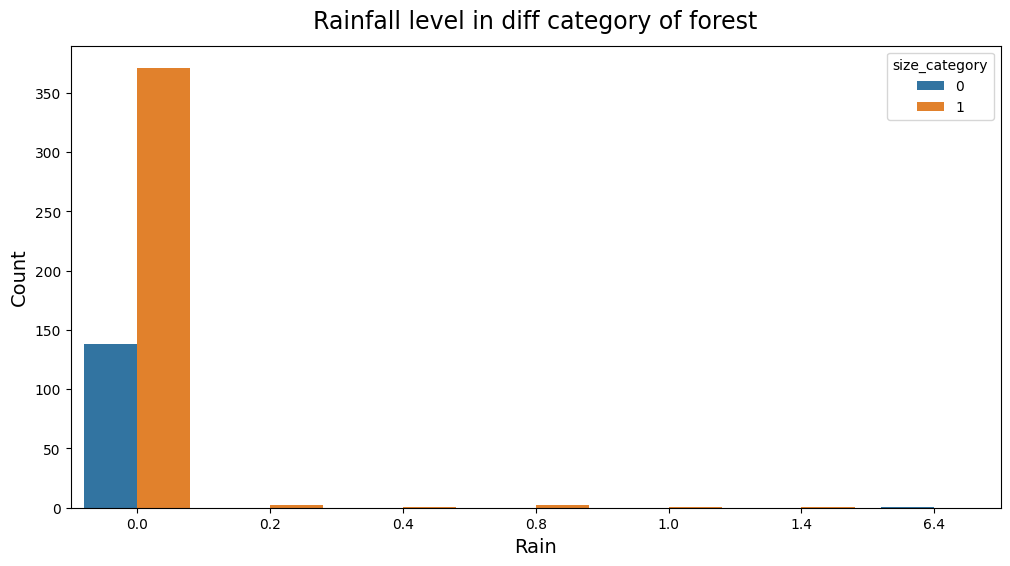

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(x='rain', y='count', hue='size_category', data= rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-140-c7ba470e5df7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['RH'])
<ipython-input-140-c7ba470e5df7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['RH'])


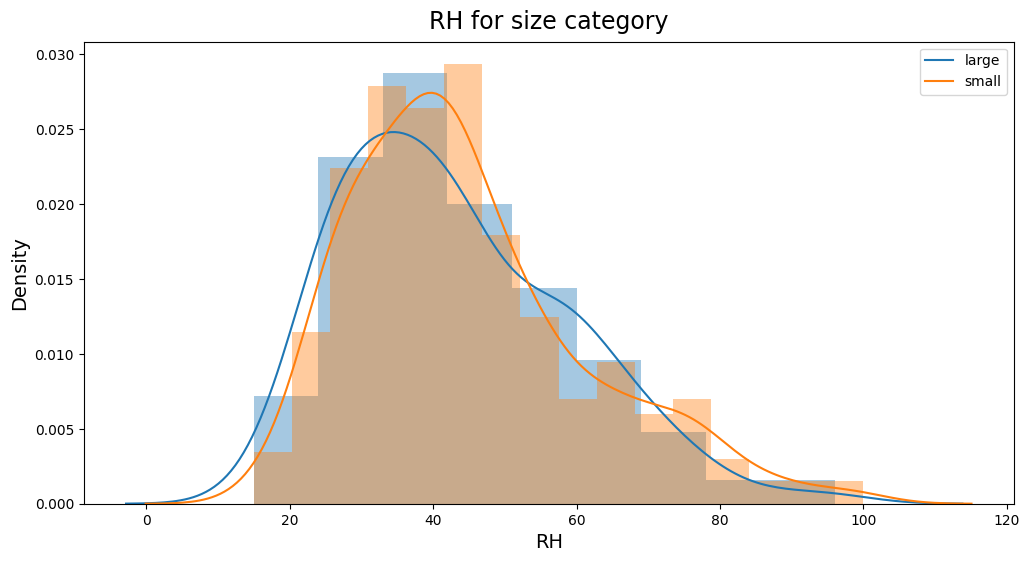

In [140]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['RH'])
sns.distplot(forestfires[forestfires['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('RH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-141-31a1dc45952b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['FFMC'])
<ipython-input-141-31a1dc45952b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['FFMC'])


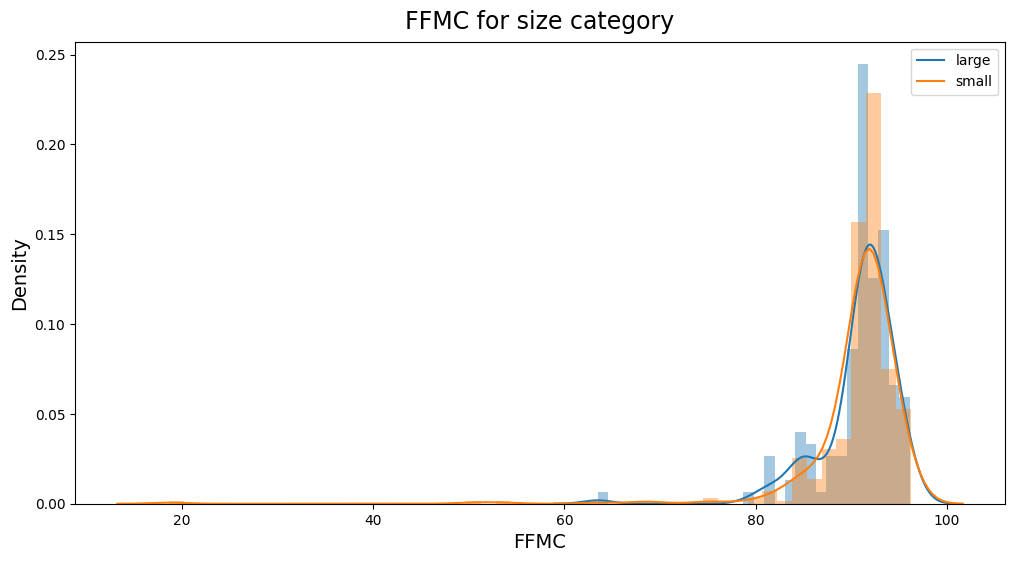

In [141]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['FFMC'])
sns.distplot(forestfires[forestfires['size_category']==1]['FFMC'])
plt.title("FFMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('FFMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-142-bfc47a667eb8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['DMC'])
<ipython-input-142-bfc47a667eb8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['DMC'])


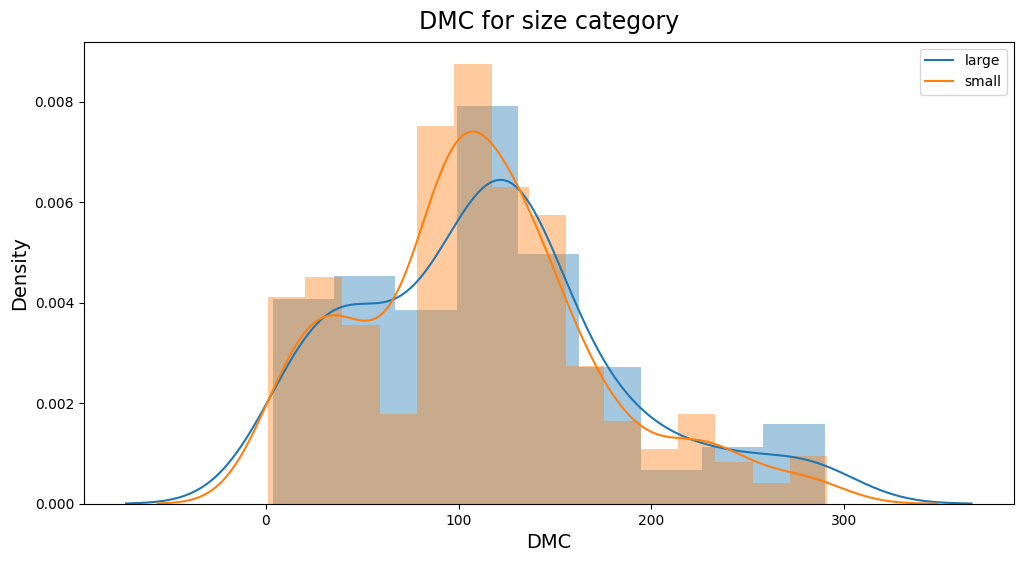

In [142]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['DMC'])
sns.distplot(forestfires[forestfires['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-143-606f202d8168>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['DC'])
<ipython-input-143-606f202d8168>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['DC'])


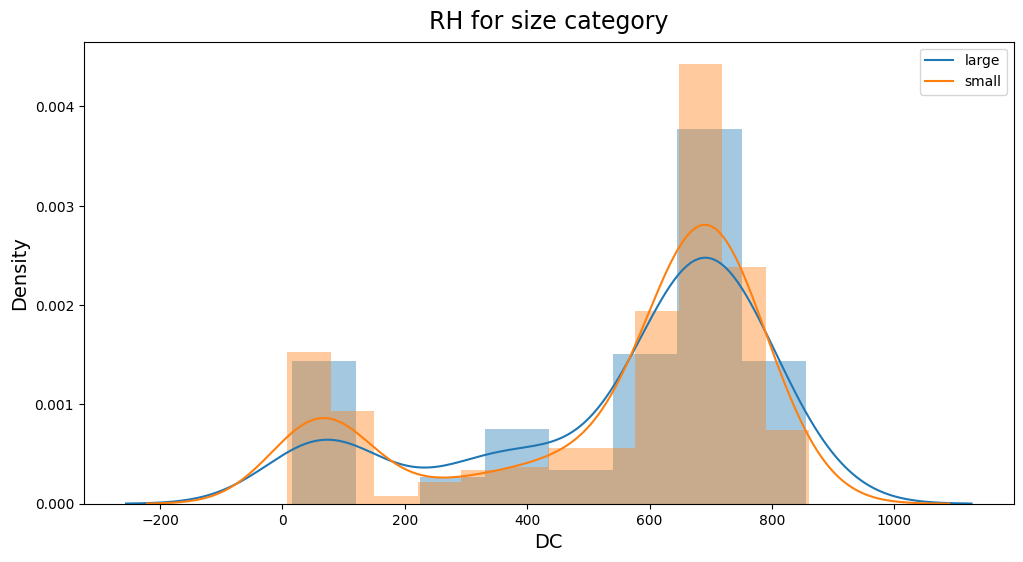

In [143]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['DC'])
sns.distplot(forestfires[forestfires['size_category']==1]['DC'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-144-c1347a574b32>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['ISI'])
<ipython-input-144-c1347a574b32>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['ISI'])


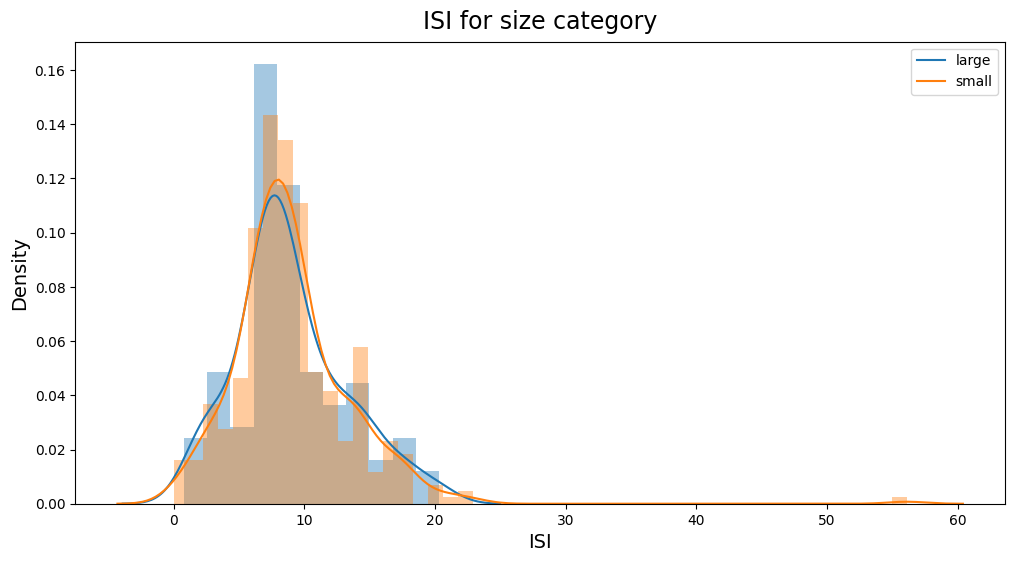

In [144]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['ISI'])
sns.distplot(forestfires[forestfires['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-145-db77e98bc2c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['temp'])
<ipython-input-145-db77e98bc2c0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['temp'])


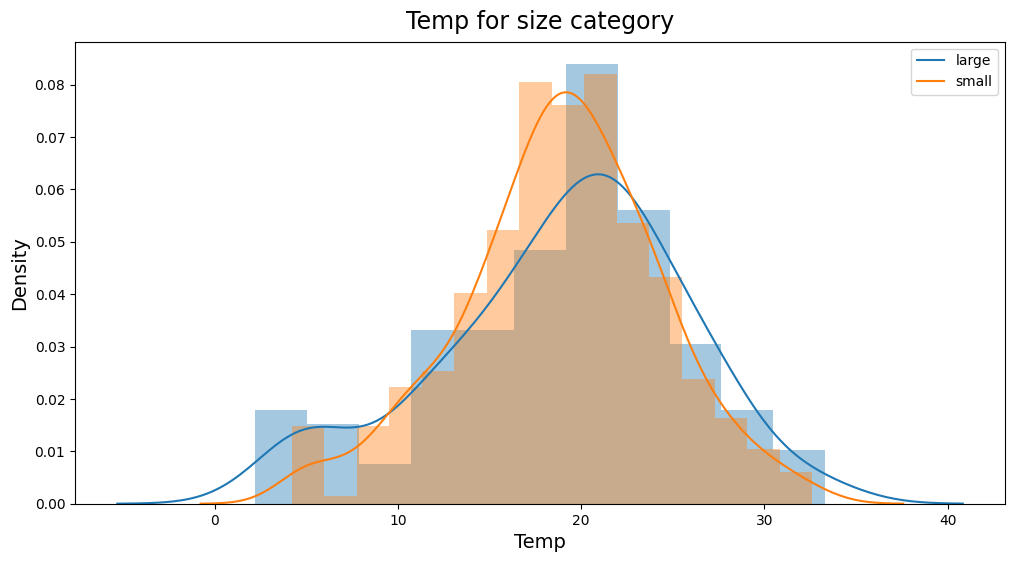

In [145]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['temp'])
sns.distplot(forestfires[forestfires['size_category']==1]['temp'])
plt.title("Temp for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

<ipython-input-146-49141c77f030>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==0]['wind'])
<ipython-input-146-49141c77f030>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forestfires[forestfires['size_category']==1]['wind'])


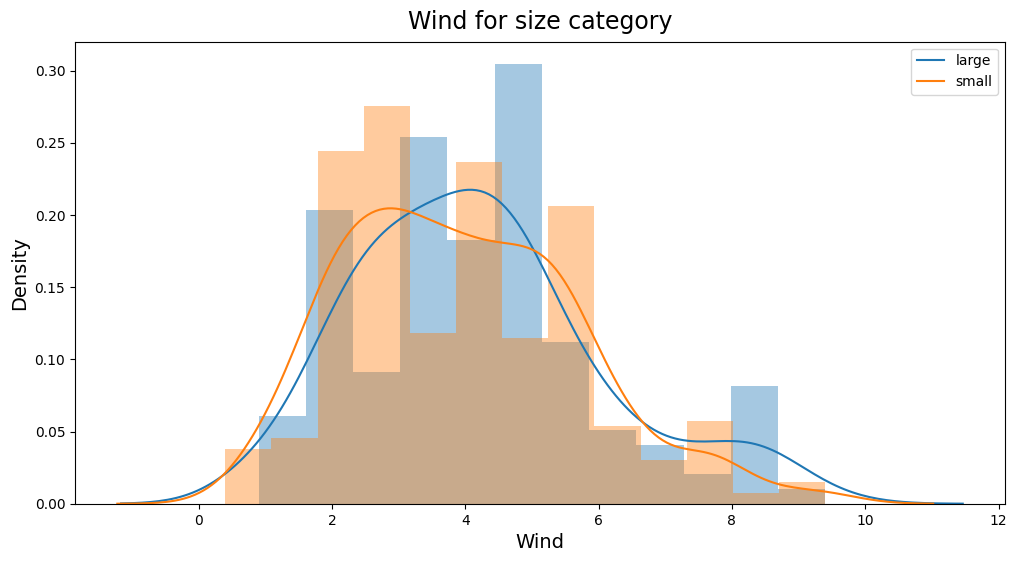

In [146]:
plt.figure(figsize=(12,6))
sns.distplot(forestfires[forestfires['size_category']==0]['wind'])
sns.distplot(forestfires[forestfires['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [147]:
##Dropping the month and day columns
forestfires.drop(["month","day"],axis=1,inplace =True)
forestfires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]

In [149]:
predictors

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [151]:
fires = norm_func(predictors)
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size = 0.25, stratify = target)

In [153]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((387, 28), (387,), (130, 28), (130,))

Model Training | Testing | Evaluation

In [154]:
#Kerel liear
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [155]:
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear==y_test)

0.9923076923076923

In [156]:
acc = accuracy_score(y_test, pred_test_linear) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, pred_test_linear)

Accuracy = 99.23076923076923


array([[34,  1],
       [ 0, 95]])

In [157]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [158]:
pred_test_poly = model_poly.predict(x_test)
np.mean(pred_test_poly==y_test)

0.7846153846153846

In [159]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [160]:
pred_test_rbf = model_rbf.predict(x_test)
np.mean(pred_test_rbf==y_test)

0.7615384615384615

In [161]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [162]:
pred_test_sig = model_rbf.predict(x_test)

In [163]:
np.mean(pred_test_sig==y_test)

0.7615384615384615

Conclusion


It is clearly evident that our linear kernel model of SVC is giving us the highest accuracy.
